# Simple Neural network from scratch

Learn how Neural network is built from scratch and used to predict Digit from Sign language digit images.

Goal:

+ Load dataset
+ Build neural network for classification

## Load required libraries

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [190]:
# Load dataset
x_l = np.load('Data/SignLanguageDigits/X.npy')
y_l = np.load('Data/SignLanguageDigits/Y.npy')

In [191]:
print(x_l.shape)
print(y_l.shape)

(2062, 64, 64)
(2062, 10)


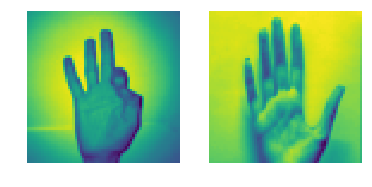

In [192]:
# Plot an image from x_l
plt.subplot(121)
plt.imshow(x_l[1])
plt.axis('off')

plt.subplot(122)
plt.imshow(x_l[-1])
plt.axis('off')

plt.show()

In [193]:
print(y_l[1], y_l[-1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [194]:
def decode_labels(y):
    y_new = []
    for target in y:
        y_new.append(np.argmax(target)) # Index of max element
    return np.array(y_new)

In [195]:
def correct_mismatches(label):
    label_map={0:9,1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}
    label_new=list()
    for s in label:
        label_new.append(label_map[s])
    label_new=np.array(label_new)
    
    return label_new

In [196]:
y_decoded=decode_labels(y_l)
y_decoded = correct_mismatches(y_decoded)
sample_per_class=np.unique(y_decoded, return_counts=True)
print("Number of Samples:{}".format(x_l.shape[0]))
for sign, number_of_sample in zip(sample_per_class[0], sample_per_class[1]):
    print("  {} sign has {} samples.".format(sign, number_of_sample))

Number of Samples:2062
  0 sign has 205 samples.
  1 sign has 206 samples.
  2 sign has 206 samples.
  3 sign has 206 samples.
  4 sign has 207 samples.
  5 sign has 207 samples.
  6 sign has 207 samples.
  7 sign has 206 samples.
  8 sign has 208 samples.
  9 sign has 204 samples.


In [197]:
def show_image_classes(image, label, n=10):
    label=decode_labels(label)
    label=correct_mismatches(label)
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):
            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index], cmap='gray')
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Sign :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} Sample for Each Classes".format(n))
    plt.show()

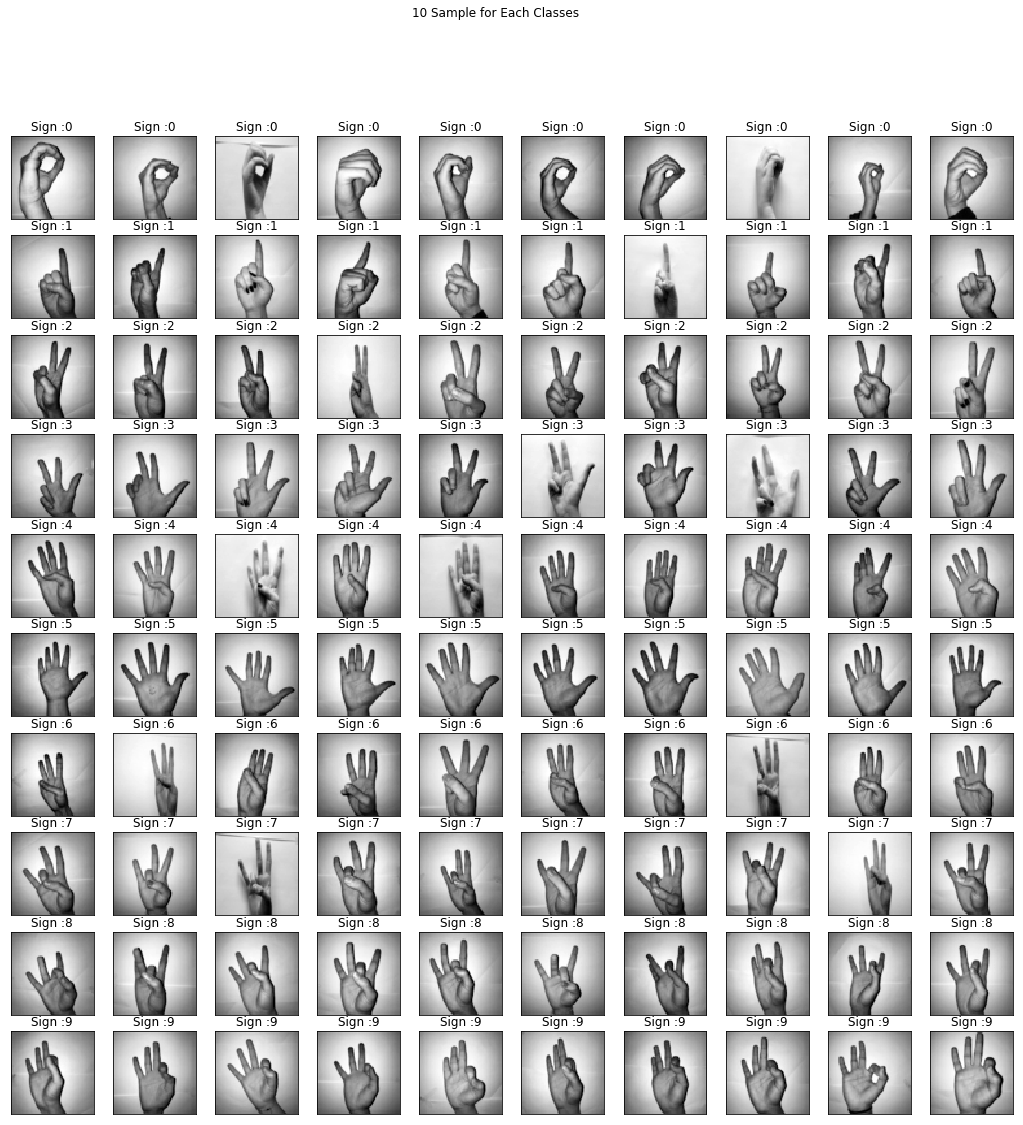

In [198]:
show_image_classes(image=x_l, label=y_l)

In [199]:
def sign_indices(labels):
    labels_decoded = decode_labels(labels)
    labels_decoded = correct_mismatches(labels_decoded)

    sign_indices = {}
    for sign in range(10):
        all_indices_for_sign = np.where(labels_decoded == sign)[0]
        sign_indices[sign] = (all_indices_for_sign[0], all_indices_for_sign[-1])
    
    return sign_indices

In [200]:
sign_indexes = sign_indices(y_l)
for k,v in sign_indexes.items():
    print(f'{k} => ({v[0]}, {v[1]})')

0 => (204, 408)
1 => (822, 1027)
2 => (1649, 1854)
3 => (1443, 1648)
4 => (1236, 1442)
5 => (1855, 2061)
6 => (615, 821)
7 => (409, 614)
8 => (1028, 1235)
9 => (0, 203)


## Build a Neural network to predict sign 3 and 6 from images.

In [201]:
def show_images(images_arr, sign, n=10):
    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for i in range(n):
        axes[i].imshow(images_arr[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.suptitle("{} Images for sign={}".format(n, sign))
    plt.show()

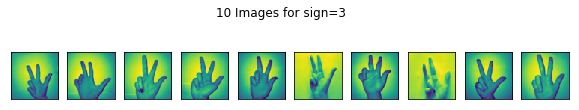

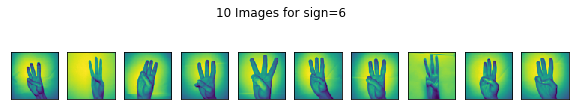

In [202]:
# Load data for sign 3 and 6
X_3 = x_l[sign_indexes[3][0] : sign_indexes[3][1]+1]
Y_3 = np.zeros(X_3.shape[0])

show_images(X_3, sign=3)

X_6 = x_l[sign_indexes[6][0] : sign_indexes[6][1]+1]
Y_6 = np.ones(X_6.shape[0])

show_images(X_6, sign=6)

In [203]:
X = np.concatenate((X_3, X_6), axis=0)
Y = np.concatenate((Y_3, Y_6), axis=0).reshape(X.shape[0], 1)

print(X.shape)
print(Y.shape)

(413, 64, 64)
(413, 1)


To build a neural network, we need to flatten the X to 2-D array

In [204]:
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
print(X.shape)

(413, 4096)


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(330, 4096)
(83, 4096)
(330, 1)
(83, 1)


In [206]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4096, 330)
(4096, 83)
(1, 330)
(1, 83)


## Build 2-layer Neural network to predict label for image array

Consider, we have 3 neurons in hidden layer and 1 neuron in output layer

In [207]:
def initialize_weights_bias(x_train, y_train, neurons_in_hidden_layer = 3):
    # Input layer weights = (3, 4096) => 3, because we have 3 neurons in hidden layer; 4096, because we have those many pixels in an image (64x64)
    # Input layer bias = (3,1) => 3, because we have 3 neurons in hidden layer; 1 bias for each neuron
    # Hidden layer weights = (1, 3) => 1, because we have 1 neuron in output layer; 3, because we have 3 neurons in hidden layer
    # Hidden layer bias = (1,1) => 1, because we have 1 neuron in output layer
    parameters = {
        'weight1': np.random.randn(neurons_in_hidden_layer, x_train.shape[0])*0.1,
        'bias1': np.zeros((neurons_in_hidden_layer, 1)),
        'weight2': np.random.randn(y_train.shape[0], neurons_in_hidden_layer) * 0.1,
        'bias2': np.zeros((y_train.shape[0], 1))
    }
    return parameters

In [208]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [209]:
def forward_prop(x_train, parameters):
    # x_train : 1 instance from train dataset => (4096, 1)
    z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1'] # (3, 1)
    a1 = np.tanh(z1) # (3, 1)
    z2 = np.dot(parameters['weight2'], a1) + parameters['bias2'] # (1, 1)
    a2 = sigmoid(z2) # (1, 1)

    cache = {
        'Z1':z1,
        'A1':a1,
        'Z2':z2,
        'A2':a2
    }

    return a2, cache

### Loss function and cost function

We're using CrossEntropy function as loss and cost function

$loss = - \sum_{i}(y_{actual} * ln (y_{predict}))$

In [210]:
def compute_cost(y_predict, y_actual):
    logprobs = np.multiply(np.log(y_predict), y_actual)
    cost = -np.sum(logprobs)/y_actual.shape[1]
    return cost

In [211]:
def backward_prop(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [212]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [213]:
def predict(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_prop(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign '3' (y_head=3),
    # if z is smaller than 0.5, our prediction is sign '6' (y_head=6),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [214]:
def simple_neural_network(x_train, y_train, x_test, y_test, epochs = 10, lr = 0.01, neurons_in_hidden_layer = 3):
    cost_list = []
    index_list = []

    parameters = initialize_weights_bias(x_train, y_train, neurons_in_hidden_layer)
    for i in range(0, epochs):
        A2, cache = forward_prop(x_train, parameters)
        cost = compute_cost(A2, y_train)
        grads = backward_prop(parameters, cache, x_train, y_train)
        parameters = update_parameters(parameters, grads, lr)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print(f'Cost after epoch {i}: {cost}')
    
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    # predictions
    y_predict_test = predict(parameters, x_test)
    y_predict_train = predict(parameters, x_train)

    # Print train/test Errors
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_predict_train - y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))
    return parameters

In [215]:
#print(X_train.shape)
#print(Y_train[:5])
#print(X_test.shape)
#print(Y_test[:5])

Cost after epoch 0: 0.32360028326318563
Cost after epoch 100: 0.3431156188886788
Cost after epoch 200: 0.33475719543083465
Cost after epoch 300: 0.3157358880846923
Cost after epoch 400: 0.2790399976992268
Cost after epoch 500: 0.23158573757757667
Cost after epoch 600: 0.18741568528132413
Cost after epoch 700: 0.15282092931182437
Cost after epoch 800: 0.12692894379380837
Cost after epoch 900: 0.10696065343586632
Cost after epoch 1000: 0.09086257016314846
Cost after epoch 1100: 0.07765802094912846
Cost after epoch 1200: 0.16351929390096334
Cost after epoch 1300: 0.06433954270286678
Cost after epoch 1400: 0.05202412576783239
Cost after epoch 1500: 0.04618700557785936
Cost after epoch 1600: 0.04152516874959791
Cost after epoch 1700: 0.03765818099500959
Cost after epoch 1800: 0.0344060588072696
Cost after epoch 1900: 0.03164081526059041
Cost after epoch 2000: 0.029270170727623602
Cost after epoch 2100: 0.027224740607604544
Cost after epoch 2200: 0.025449221113659624
Cost after epoch 2300: 0

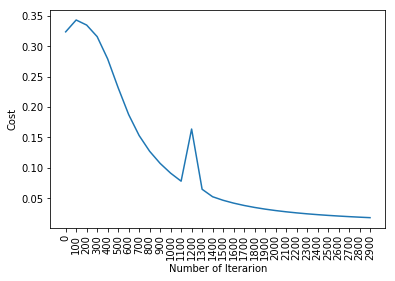

Train accuracy: 99.39393939393939 %
Test accuracy: 95.18072289156626 %


In [221]:
params = simple_neural_network(X_train, Y_train, X_test, Y_test, epochs=3000) # 2500 => 97.59 % 
#print (params)